## Cleaning and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/health')

In [ ]:
import pandas as pd

features_path = 'training_set_features.csv'
labels_path = 'training_set_labels.csv'
features_df = pd.read_csv(features_path)
labels_df = pd.read_csv(labels_path)

In [ ]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
data_df = pd.merge(features_df, labels_df, on='respondent_id')

In [ ]:
data_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
data_df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
data_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


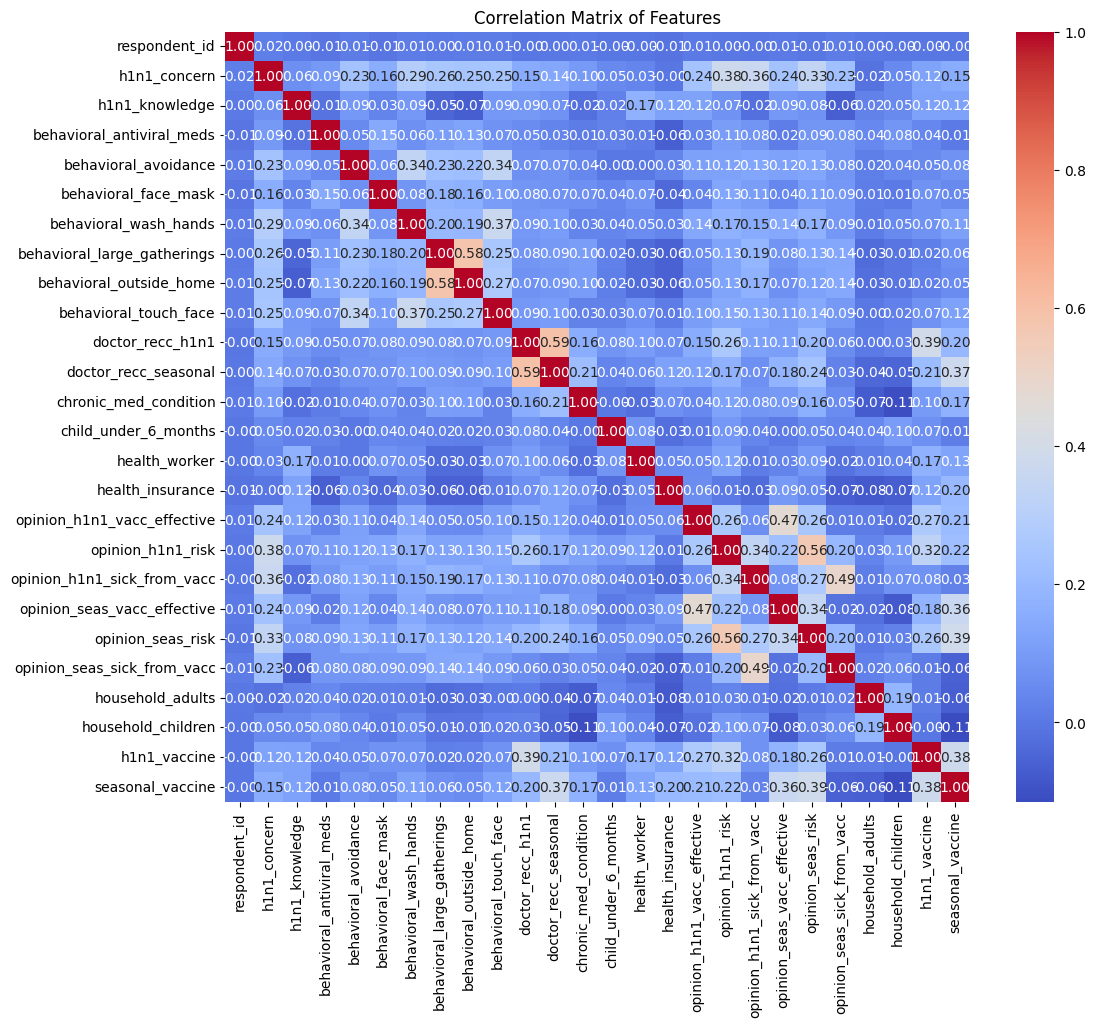

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
corr_matrix = data_df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
data_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
# Assuming data_df is your merged DataFrame
import pandas as pd

# Identify categorical variables
categorical_vars = [col for col in data_df.columns if data_df[col].dtype == 'object']

# Remove target variables from the list of categorical variables if included
categorical_vars = [col for col in categorical_vars if col not in ['h1n1_vaccine', 'seasonal_vaccine']]

print("Categorical Variables:", categorical_vars)


Categorical Variables: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [ ]:
# One-hot encode the categorical variables
encoded_df = pd.get_dummies(data_df[categorical_vars], drop_first=True)

# Add target variables back into the encoded DataFrame
encoded_df['h1n1_vaccine'] = data_df['h1n1_vaccine']
encoded_df['seasonal_vaccine'] = data_df['seasonal_vaccine']

In [ ]:
# Calculate the correlation matrix for the encoded DataFrame including the target variables
corr_matrix = encoded_df.corr()

# Filter to show correlations with the target variables
target_corr_h1n1 = corr_matrix['h1n1_vaccine'].sort_values(ascending=False)
target_corr_seasonal = corr_matrix['seasonal_vaccine'].sort_values(ascending=False)

# Assuming corr_matrix, target_corr_h1n1, and target_corr_seasonal are defined as shown previously

print("Correlation with H1N1 Vaccine:")
for index, value in target_corr_h1n1.iteritems():
    print(f"{index}: {value:.4f}")

print("\nCorrelation with Seasonal Vaccine:")
for index, value in target_corr_seasonal.iteritems():
    print(f"{index}: {value:.4f}")

Correlation with H1N1 Vaccine:
h1n1_vaccine: 1.0000
seasonal_vaccine: 0.3771
employment_industry_fcxhlnwr: 0.1447
employment_occupation_cmhcxjea: 0.1397
employment_occupation_dcjcmpih: 0.0747
employment_industry_haxffmxo: 0.0747
education_College Graduate: 0.0638
income_poverty_> $75,000: 0.0580
employment_occupation_haliazsg: 0.0394
hhs_geo_region_bhuqouqj: 0.0390
age_group_55 - 64 Years: 0.0381
race_White: 0.0309
employment_industry_wxleyezf: 0.0218
age_group_65+ Years: 0.0204
hhs_geo_region_oxchjgsf: 0.0156
employment_occupation_dlvbwzss: 0.0147
hhs_geo_region_mlyzmhmf: 0.0134
employment_status_Not in Labor Force: 0.0131
employment_occupation_emcorrxb: 0.0130
hhs_geo_region_qufhixun: 0.0088
employment_occupation_hodpvpew: 0.0081
race_Other or Multiple: 0.0025
census_msa_MSA, Principle City: 0.0021
employment_industry_qnlwzans: 0.0010
census_msa_Non-MSA: -0.0007
hhs_geo_region_lrircsnp: -0.0015
employment_occupation_kldqjyjy: -0.0018
race_Hispanic: -0.0029
employment_occupation_xzmly

<ipython-input-14-b4a7e13645e9>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in target_corr_h1n1.iteritems():
<ipython-input-14-b4a7e13645e9>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in target_corr_seasonal.iteritems():


In [ ]:
# Assuming data_df is your DataFrame
complete_cases_df = data_df.dropna()

# Number of rows with no missing values
num_complete_rows = len(complete_cases_df)

print(f"Number of rows with no missing values: {num_complete_rows}")

Number of rows with no missing values: 6437


## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Separate features and target variables for both H1N1 and Seasonal vaccine predictions
X = complete_cases_df.drop(['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1, errors='ignore')
y_h1n1 = complete_cases_df['h1n1_vaccine']
y_seasonal = complete_cases_df['seasonal_vaccine']

In [ ]:
# Split the dataset into training (80%) and test (20%) sets for both targets
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

## Models: Traing and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming X_train, y_train_h1n1 are prepared and preprocessed

# Define the preprocessing for categorical variables: one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

# Models to train
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train_h1n1)  # Training
    y_pred = pipeline.predict(X_test)  # Predictions
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    accuracy = accuracy_score(y_test_h1n1, y_pred)
    roc_auc = roc_auc_score(y_test_h1n1, y_pred_proba)

    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

LogisticRegression - Accuracy: 0.8315, ROC AUC: 0.8773
RandomForest - Accuracy: 0.8354, ROC AUC: 0.8625
GradientBoosting - Accuracy: 0.8331, ROC AUC: 0.8727
SVM - Accuracy: 0.8300, ROC AUC: 0.8752
XGBoost - Accuracy: 0.8152, ROC AUC: 0.8656
